## Chapter 12 Exercises

### Problem 8
Write a function my_fun_plotter(f, x) where f is a lambda function and x is an array. The function should plot f evaluated at x. Remember to label the x- and y-axes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def my_fun_plotter(f, x):
    plt.plot(x, f(x))
    plt.xlabel("X axis", fontsize = 10)
    plt.ylabel("Y axis", fontsize = 10)
    plt.show()

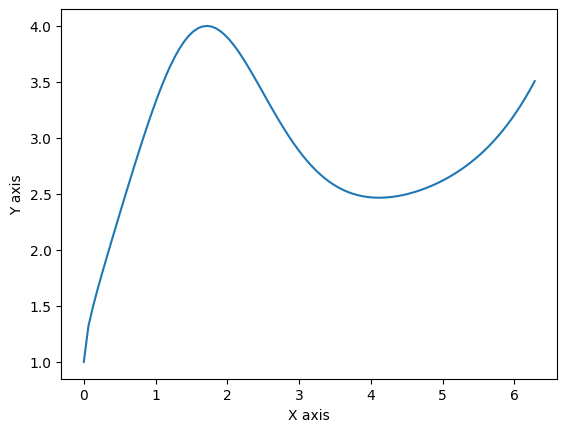

In [2]:
my_fun_plotter(lambda x: np.sqrt(x) + np.exp(np.sin(x)),
np.linspace(0, 2*np.pi, 100))

### Problem 9
Write a function with my_poly_plotter(n,x) that plots the polynomials $p_k (x) = x^k$ for $k = 1, \ldots, n$. Make sure your plot has axis labels and a title.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def my_poly_plotter(n, x):
    for i in range(n):
        plt.plot(x, x**(i+1))
    plt.title(f"Polynomials upto degree {n}")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.show()

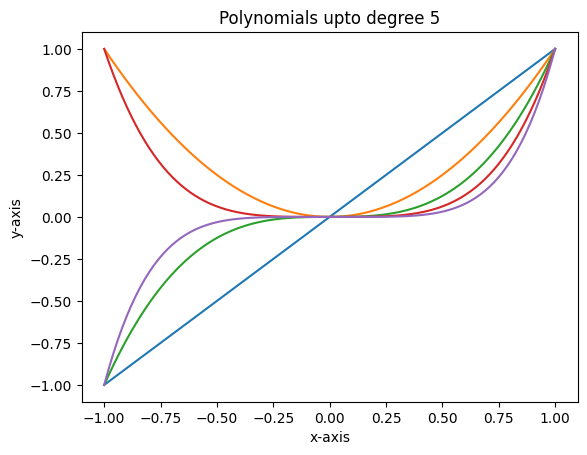

In [12]:
my_poly_plotter(5, np.linspace(-1, 1, 200))

### Problem 10
Assume you have three points at the corner of an equilateral triangle, $P_1 = (0, 0), P_2 = (0.5,\sqrt(3)/2),$ and $P_3 = (1, 0)$. Generate another set of points $p_i = (x_i , y_i)$ such that $p_1 = (0, 0)$ and $p_{i+1}$ is the midpoint between $p_i$ and $P_1$ with $33\%$ probability, the midpoint between $p_i$ and $P_2$ with $33\%$ robability, and the midpoint between $p_i$ and $P_3$ with $33\%$ probability. Write a function my_sierpinski(n) that generates the points $p_i$ for $i = 1, \ldots , n$. The function should make a plot of the points using blue dots (i.e., "b." as the third argument to the plt.plot function).


In [7]:
import numpy as np
import matplotlib.pyplot as plt
def my_serpinski(n):
    P1 = np.array([0, 0])
    P2 = np.array([0.5, np.sqrt(3)/2])
    P3 = np.array([1, 0])

    plt.plot(0, 0, "b.", markersize=1)
    plt.plot(0.5, np.sqrt(3)/2, "b.", markersize=1)
    plt.plot(1, 0, "b.", markersize=1)

    initial_points = np.array([(P1+P2)/2, (P1+P3)/2, (P2+P3)/2])

    p = np.zeros((n, 2))

    k = np.random.choice([0, 1, 2])

    p[:1, :] = initial_points[k]

    x = [p[0][0]]
    y = [p[0][1]]

    for i in range(1, n):
        j = np.random.choice([0, 1, 2])

        p[i:i+1, :] = np.array([(p[i-1:i, :]+P1)/2, (p[i-1:i, :]+P2)/2, (p[i-1:i, :]+P3)/2])[j]

        x.append(p[i][0])
        y.append(p[i][1])
    
    for i in range(n):
        plt.plot(x[i], y[i], "b.", markersize=1)

    plt.show()



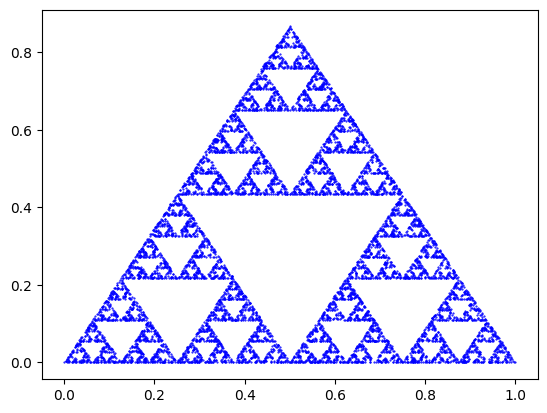

In [8]:
my_serpinski(10000)

### Problem 11
Assume you are generating a set of points $(x_i , y_i)$ where $x_1 = 0$ and $y_1 = 0$. The points $(x_i , y_i)$ for $i = 2, \ldots , n$ are generated according to the following probabilistic relationship:

With probability $1\%$: $$x_i = 0,\quad y_i = 0.16y_{i-1};$$

With probability $7\%$: $$x_i = 0.2x_{i-1} - 0.26y_{i-1},\quad y_i = 0.23x_{i-1} + 0.22y_{i-1} + 1.6;$$

With probability $7\%$: $$x_i = -0.15x_{i-1} + 0.28y_{i-1},\quad y_i = 0.26x_{i-1} + 0.24y_{i-1} + 0.44;$$

With probability $85\%$: $$x_i = 0.85x_{i-1} + 0.04y_{i-1},\quad y_i = -0.04x_{i-1} + 0.85y_{i-1} + 1.6$$

Write a function my_fern(n) that generates the points $(x_i , y_i)$ for $i = 1, \ldots , n$ and plots them using blue dots. Also use plt.axis("equal") and plt.axis("off") to make the plot more attractive.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
def my_fern(n):
    x = [0]
    y = [0]

    for i in range(1, n):
        event = np.random.choice([1, 2, 3, 4], p=[0.01, 0.07, 0.07, 0.85])

        if event == 1:
            x.append(0)
            y.append(0.16*y[i-1])
        elif event == 2:
            x.append(0.2*x[i-1]-0.26*y[i-1])
            y.append(0.23*x[i-1]+0.22*y[i-1]+1.6)
        elif event == 3:
            x.append(-0.15*x[i-1]+0.28*y[i-1])
            y.append(0.26*x[i-1]+0.24*y[i-1]+0.44)
        else:
            x.append(0.85*x[i-1]+0.04*y[i-1])
            y.append(-0.04*x[i-1]+0.85*y[i-1]+1.6)
        
    for i in range(n):
        plt.plot(x[i], y[i], "b.", markersize=0.7)
    plt.axis("equal")
    plt.axis("off")
    plt.show()


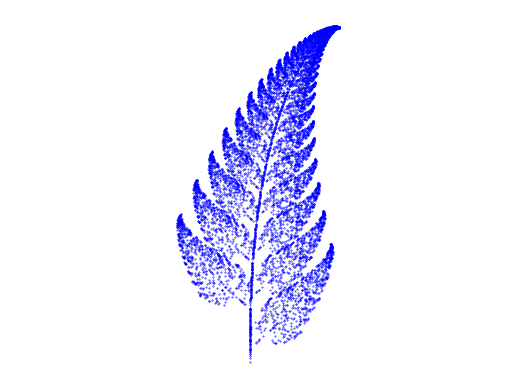

In [19]:
my_fern(10000)